In [1]:
import numpy as np
import anndata as ann
import pandas as pd
import scanpy as sc
import scvelo as scv
import scipy as sp
# import scipy as sci
import matplotlib.pyplot as pl
import matplotlib.pylab as pit
# import math
# import csv
# import loompy
import leidenalg
import bbknn
#pretty plotting
import seaborn as sb
import scrublet as scr

from IPython.core.display import display, HTML
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
sc.logging.print_versions()
scv.logging.print_version()

-----
anndata     0.7.4
scanpy      1.6.1
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
annoy               NA
appnope             0.1.0
asciitree           NA
backcall            0.2.0
bbknn               NA
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
get_version         2.1
h5py                2.10.0
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           5.3.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.33.0+1.g022ab0f
matplotlib          3.2.2
mkl                 2.3.0
mpl_toolkits        NA
msgpack             1.0.0
natsort             7.0.1
n

# Set project file paths

In [3]:
file_path = '/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment'

In [4]:
data_dir = file_path + '/data/' 
table_dir = file_path + '/tables/'
sc.settings.figdir = file_path + '/figures/'

In [5]:
adata=sc.read('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/data/Overlay_treatment_preprocessing_tumor_cells_bbknn_V01-sb.h5ad')

In [6]:
np.shape(adata)

(14233, 12681)

In [7]:
adata

AnnData object with n_obs × n_vars = 14233 × 12681
    obs: 'batch', 'batch_key', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'phase', 'S_score', 'G2M_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'log_total_counts', 'log_pct_counts_ribo', 'log_pct_counts_mito', 'samples2', 'leiden', 'samples'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo', 'n_counts', 'highly_variable', 'me

In [8]:
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True, transparent=True, color_map='RdBu_r')

In [9]:
sc.tl.leiden(adata, resolution=0.5) 

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:41)


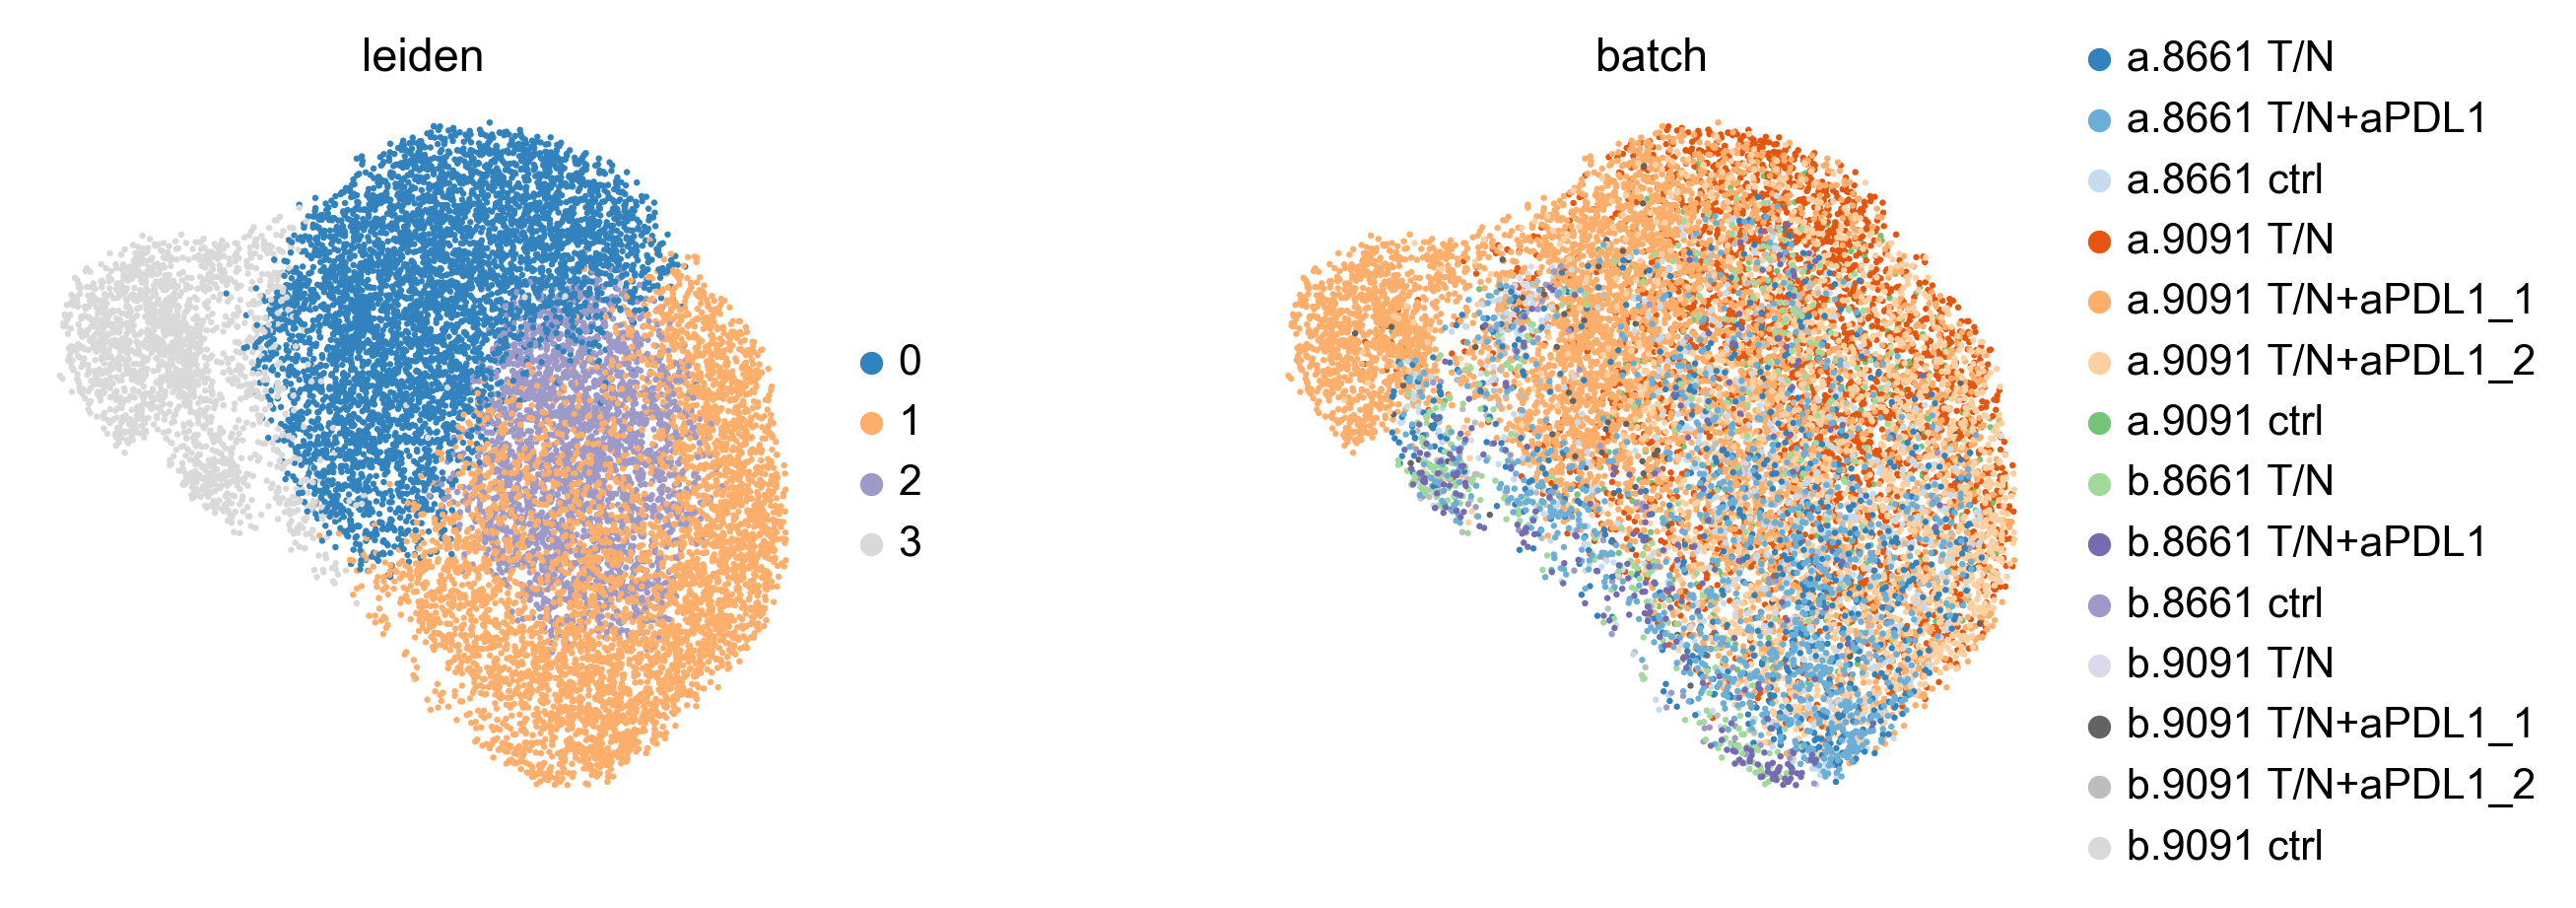

In [10]:
sc.pl.umap(adata, color=['leiden','batch'], size=15, wspace=0.4, palette='tab20c', frameon=False)

## batch visualization simplified

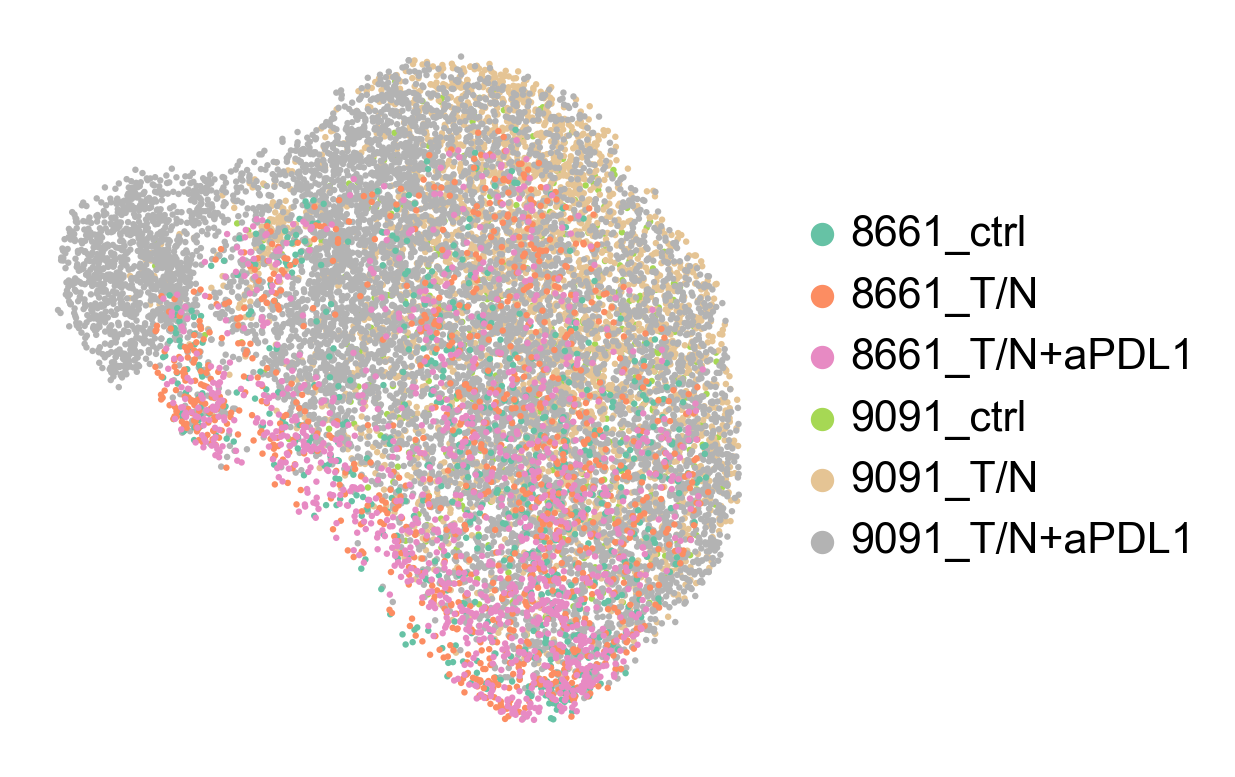

In [11]:
sc.pl.umap(adata, color='samples2', title='', size=15, wspace=0.4, palette='Set2', frameon=False)

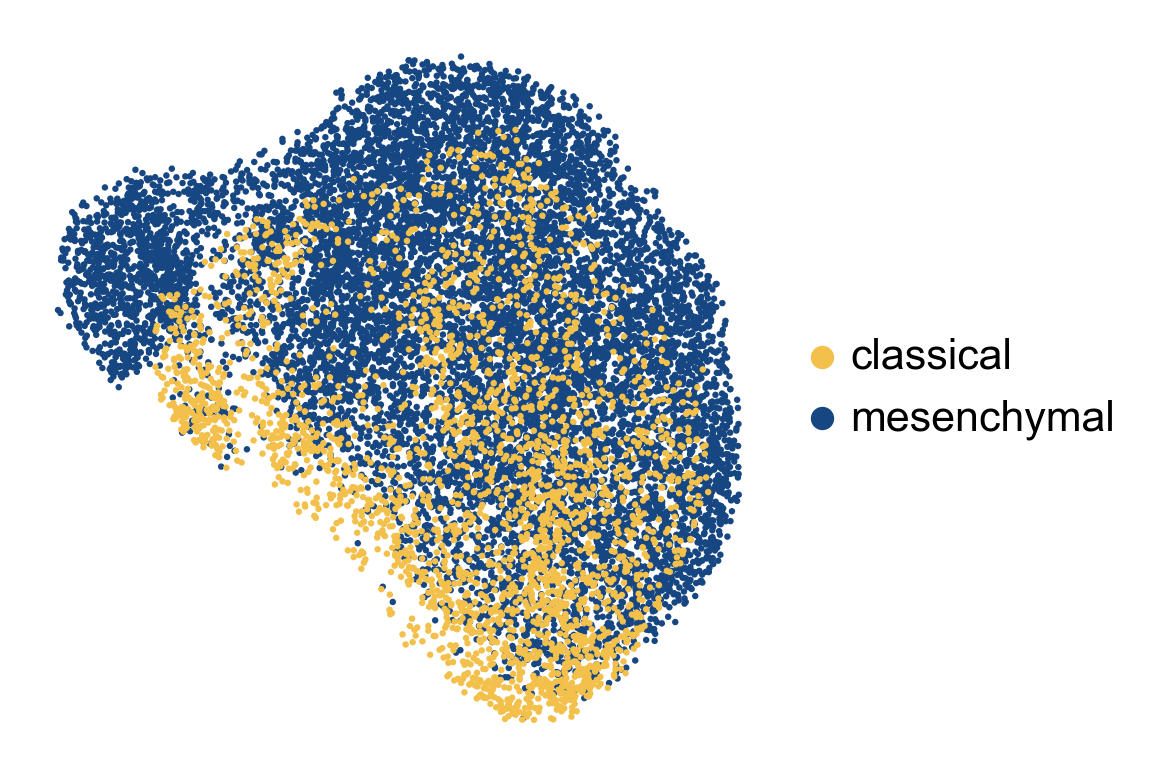

In [12]:
sc.pl.umap(adata, color='samples', title='', size=15, wspace=0.4, palette=['#f2c04b','#174782'], frameon=False)

In [13]:
sc.tl.embedding_density(adata, groupby='samples2')

computing density on 'umap'
--> added
    'umap_density_samples2', densities (adata.obs)
    'umap_density_samples2_params', parameter (adata.uns)


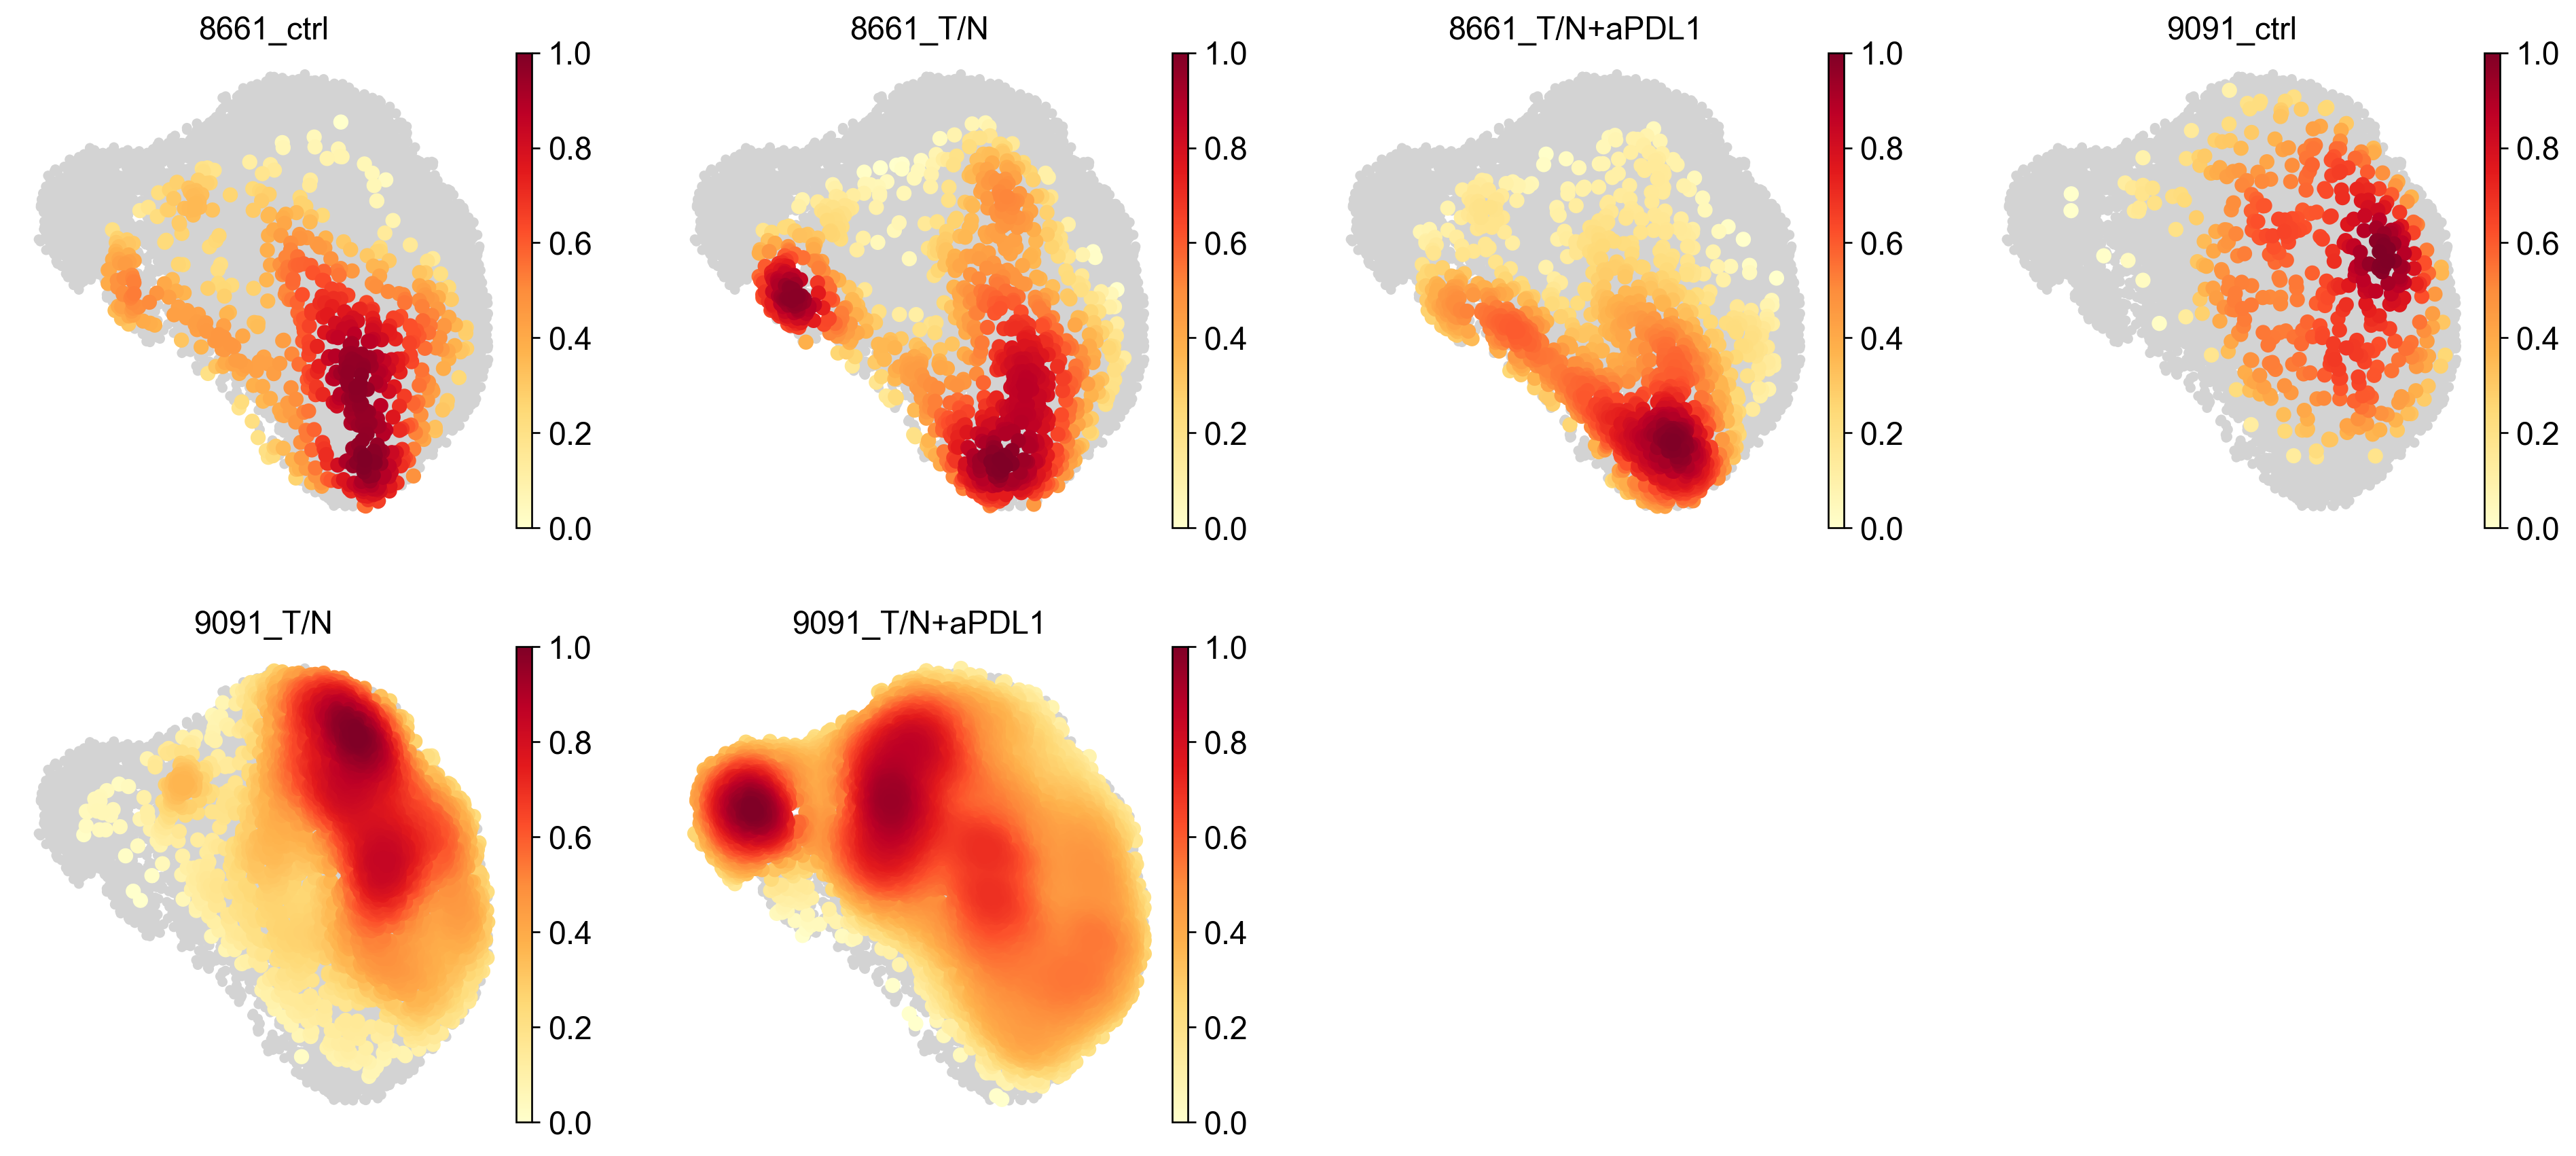

In [14]:
sc.pl.embedding_density(adata, groupby='samples2', frameon=False)